# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 4: Working with geospatial data and mapping

Mark Bauer

Table of Contents
=================

   1. Importing Libraries 
   2. Reading and Writing Files
       * 2.1 Reading Spatial Data
       * 2.2 Writing Spatial Data   
   3. Data Structures
       * 3.1 GeoSeries
       * 3.2 GeoDataFrame 
   4. Attributes and Methods
       * 4.1 Basic Attributes
       * 4.2 Basic Methods
       * 4.3 Create Centroids from Polygons
       * 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates
   5. Making Maps
       * 5.1 Points
       * 5.2 Lines
       * 5.3 Polygons
       * 5.4 Maps with Layers
       * 5.5 Adding Background Map
       * 5.6 Clip Data
   6. Joining Data
       * 6.1 Attribute Join
       * 6.2 Spatial Join
   7. Indexing and Selecting Data
   8. Coordinate Reference Systems
   9. Types of Maps
       * 9.1 Choropleth Maps
       * 9.2 Heat Maps
       * 9.3 Hexbin Map
       * 9.4 Proportional Symbol Map
       * 9.5 Graduated Symbol Map
       * 9.6 Voroni Map
       * 9.7 Quadtree Map
   10. Relationship Tests
  11. Set Operations with Overlay
       * 11.1 Union
       * 11.2 Intersection
       * 11.3 Symmetric Difference
       * 11.4 Difference
       * 11.5 Identity
       * 11.6 Aggregation with Dissolve
  12. Additional Attributes and Methods
       * 12.1 Unary Predicates
       * 12.2 Binary Predicates
           * 12.2.1 Centroids vs. Representative Points
       * 12.3 Constructive Methods / Affine Transformations
           * 12.3.1 Buffer
           * 12.3.2 Translate/Offset


**Goal:** In this notebook, we will review various workflows of working with geospatial data and mapping.

**Main Libraries:** 

[GeoPandas](https://geopandas.org/index.html) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

[geoplot](https://residentmario.github.io/geoplot/index.html#) is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Datasets
### Schools  
https://data.cityofnewyork.us/Education/School-Point-Locations/jfju-ynrr

## Streets  
https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

## Streets  
https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import fiona
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable
import urllib
import json
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import contextily as ctx

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,geopandas,geoplot,matplotlib.pyplot

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy            : 1.23.1
pandas           : 1.4.3
geopandas        : 0.11.1
geoplot          : 0.5.1
matplotlib.pyplot: unknown



Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading and Writing Files

## 2.1 Reading Spatial Data

In [4]:
# saving neighborhood tabulation areas (nta) file link as 'url'
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'

# Reading in GeoJSON
nta_shape = gpd.read_file(url)

# returning first five rows 
nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [5]:
# saving school points shapefile link as 'zipfile'
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'

# reading in data as 'school_points
school_points = gpd.read_file(zipfile) 

# returning first five rows 
school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

In [6]:
# listing files in our data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


## 2.2 Writing Spatial Data

In [7]:
# Writing nta file to Shapefile foramt
nta_shape.to_file("data/nta_shape.shp")

# Writing nta file to GeoJSON format
nta_shape.to_file("data/nta_shape.geojson", driver='GeoJSON')

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_46579/500934820.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nta_shape.to_file("data/nta_shape.shp")


In [8]:
# listing fiels in our data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


# 3. Data Structures

In [9]:
# preview first five rows of dataframe
nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

## 3.1 GeoSeries

In [10]:
# returning the type of a column in our dataframe
type(nta_shape['geometry'])

geopandas.geoseries.GeoSeries

## 3.2 GeoDataFrame

In [11]:
# returning the type of our data in our dataframe
type(nta_shape)

geopandas.geodataframe.GeoDataFrame

# 4. Attributes and Methods

## 4.1 Basic Attributes

In [12]:
# reading in our nta dataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [13]:
# returns the object's Coordinate Reference System (CRS)
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# changing the CRS to 2263
nta_shape = nta_shape.to_crs(epsg=2263)

nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
# returning the geometry column name of our dataframe
nta_shape.geometry.name

'geometry'

In [16]:
# returns the area of each geometry in our dataframe
nta_shape.area

0      7.741292e+07
1      2.052830e+07
2      1.778215e+07
3      2.566604e+07
4      8.246160e+07
           ...     
190    5.519307e+07
191    4.278989e+07
192    4.730839e+07
193    2.540283e+07
194    1.598438e+07
Length: 195, dtype: float64

In [17]:
# returns the length of each geometry in our dataframe
nta_shape.length

0      45401.262716
1      23971.493289
2      21976.031015
3      21945.690949
4      36708.211754
           ...     
190    32086.739784
191    35466.510739
192    43697.079559
193    28027.326968
194    17103.361497
Length: 195, dtype: float64

In [18]:
# returns the bounds of each geometry in our dataframe
nta_shape.bounds

minx           miny          maxx           maxy
0    1.044355e+06  184842.840242  1.055351e+06  197901.534733
1    9.925332e+05  186731.779052  9.972079e+05  193698.066081
2    9.903994e+05  161044.243516  9.945618e+05  167554.191858
3    1.010225e+06  254827.669741  1.015865e+06  262072.319341
4    1.028592e+06  180687.517539  1.039417e+06  191428.558482
..            ...            ...           ...            ...
190  1.054445e+06  202832.806018  1.064490e+06  212784.943786
191  1.041459e+06  198275.763923  1.052902e+06  205384.223315
192  1.035163e+06  191039.995759  1.048446e+06  200102.474807
193  9.975092e+05  232832.234102  1.002565e+06  243901.663415
194  9.955584e+05  238330.913036  1.001231e+06  243240.501556

[195 rows x 4 columns]

In [19]:
# returns the values for the bounds of the series as a whole
nta_shape.total_bounds

array([ 913175.322545  ,  120128.46967879, 1067382.55674218,
        272844.42019008])

In [20]:
# returning the count of unique values of our geometry types
nta_shape.geom_type.value_counts()

MultiPolygon    195
dtype: int64

In [21]:
# returning the count of unique values of valid geometry
nta_shape.is_valid.value_counts()

True    195
dtype: int64

In [22]:
# saving school point data link as 'zipfile'
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile) 

# returning first five rows of dataframe
school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

In [23]:
# returns the x-coordinate of each geometry
school_points['geometry'].x

0       9.809851e+05
1       9.977851e+05
2       9.912250e+05
3       9.884397e+05
4       9.882051e+05
            ...     
1704    1.000975e+06
1705    1.027677e+06
1706    1.008200e+06
1707    1.008240e+06
1708    1.006497e+06
Length: 1709, dtype: float64

In [24]:
# returns the y-coordinate of each geometry
school_points['geometry'].y

0       175780.758994
1       178431.910832
2       156323.361213
3       160709.992624
4       158329.591337
            ...      
1704    216289.828741
1705    251468.397826
1706    259137.236530
1707    259105.896860
1708    235553.859500
Length: 1709, dtype: float64

## 4.2 Basic Methods

In [25]:
# returns the centroid of each geometry
nta_shape.centroid

0      POINT (1049933.729 191188.768)
1       POINT (994687.841 189923.623)
2       POINT (992488.356 164182.300)
3      POINT (1013115.278 258632.519)
4      POINT (1034328.472 185669.737)
                    ...              
190    POINT (1060002.734 207353.643)
191    POINT (1046313.693 201910.417)
192    POINT (1041371.352 195964.567)
193    POINT (1000643.628 237395.774)
194     POINT (998512.380 240587.352)
Length: 195, dtype: geometry

In [26]:
# returning the distance of the shape to its centroid
nta_shape.distance(nta_shape.centroid)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
190    0.0
191    0.0
192    0.0
193    0.0
194    0.0
Length: 195, dtype: float64

In [27]:
# saving the distance of the shape to its centroid as 'distance'
distance = nta_shape.distance(nta_shape.centroid)

# returning the count of unique values
distance.value_counts()

0.000000       186
211.709350       1
2163.627115      1
1440.091974      1
308.648929       1
368.138583       1
6188.915583      1
4756.607377      1
5655.451381      1
226.375219       1
dtype: int64

In [28]:
# returns a centroid that is guaranteed to be within the geometry
nta_shape.representative_point()

0      POINT (1050079.802 191559.967)
1       POINT (993974.859 190123.460)
2       POINT (992387.504 164298.294)
3      POINT (1012889.153 258442.655)
4      POINT (1034035.366 186002.978)
                    ...              
190    POINT (1059665.263 207710.811)
191    POINT (1047624.222 201825.168)
192    POINT (1039609.073 195563.142)
193    POINT (1000973.543 238364.922)
194     POINT (998816.003 240775.188)
Length: 195, dtype: geometry

In [29]:
# saving the distance of the shape to its centroid as 'distance'
distance = nta_shape.distance(nta_shape.representative_point())

# returning the count of unique values
distance.value_counts()

0.0    195
dtype: int64

In [30]:
print("Old CRS: " + str(nta_shape.crs)) # printing the current CRS of the nta
print("New CRS: " + str(nta_shape.to_crs(epsg=4326).crs)) # changing and printing the CRS to '4326'

Old CRS: epsg:2263
New CRS: epsg:4326


<AxesSubplot:>

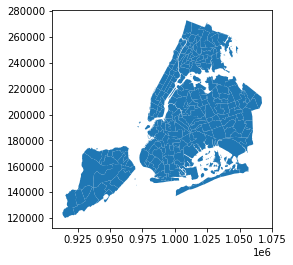

In [31]:
# plotting the geodataframe
nta_shape.plot()

<AxesSubplot:>

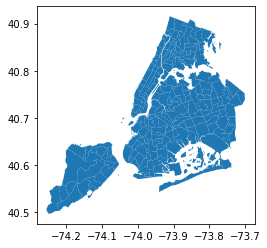

In [32]:
# changing the CRS and then plotting the geodataframe
nta_shape.to_crs(epsg=4326).plot()

## 4.3 Create Centroids from Polygons

In [33]:
# returning first five rows
nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....  
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....  
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...  
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...

<AxesSubplot:>

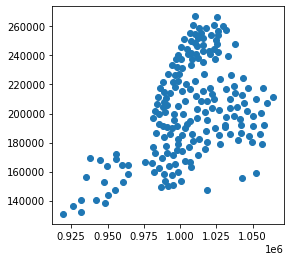

In [34]:
# returning the centroid of our shape and saving as a new column called 'centroid_column'
nta_shape['centroid_column'] = nta_shape.centroid

# setting our geometry as the new centroid column and then plotting 
nta_shape.set_geometry('centroid_column').plot()

## 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates

In [35]:
# reading in our nta data as a geodataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url) 

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [36]:
# creating colums for the x and y coordinates of our geometries and deleting previous geometries
nta_shape['centroid_column'] = nta_shape.centroid
nta_shape = nta_shape.set_geometry('centroid_column')

nta_shape['x'] = nta_shape.centroid_column.x
nta_shape['y'] = nta_shape.centroid_column.y
nta_shape_no_geometry = nta_shape[['ntaname', 'x', 'y']]

nta_shape_no_geometry.head()

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_46579/992993916.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['centroid_column'] = nta_shape.centroid


ntaname          x          y
0             St. Albans -73.763146  40.691202
1           Clinton Hill -73.962363  40.687967
2    Ocean Parkway South -73.970326  40.617315
3  Van Cortlandt Village -73.895622  40.876513
4       South Ozone Park -73.819459  40.676155

In [37]:
# prining the type of our dataframe
print(type(nta_shape_no_geometry))

<class 'pandas.core.frame.DataFrame'>


In [38]:
# Generate GeometryArray of point geometries from x, y coordinates
nta_shape_with_geometry = gpd.GeoDataFrame(nta_shape_no_geometry, 
                                           geometry=gpd.points_from_xy(nta_shape_no_geometry.x,
                                                                       nta_shape_no_geometry.y))
# previewing our new point geometry column
nta_shape_with_geometry.head()

ntaname          x          y                    geometry
0             St. Albans -73.763146  40.691202  POINT (-73.76315 40.69120)
1           Clinton Hill -73.962363  40.687967  POINT (-73.96236 40.68797)
2    Ocean Parkway South -73.970326  40.617315  POINT (-73.97033 40.61731)
3  Van Cortlandt Village -73.895622  40.876513  POINT (-73.89562 40.87651)
4       South Ozone Park -73.819459  40.676155  POINT (-73.81946 40.67616)

In [39]:
# returning the type of our new geodataframe
type(nta_shape_with_geometry)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

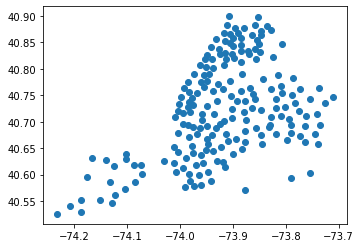

In [40]:
# plotting our data
nta_shape_with_geometry.plot()

# 5. Making Maps

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons

## 5.1 Points

In [41]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

<AxesSubplot:>

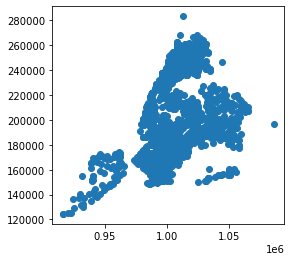

In [42]:
school_points.plot()

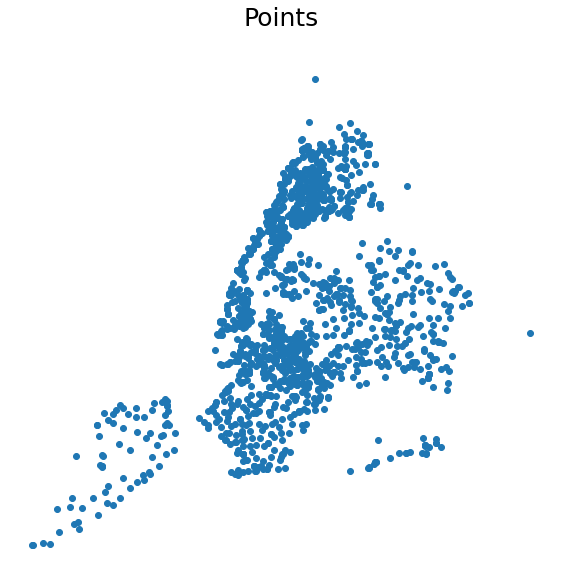

In [43]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# converting to more accurate coordinate referance system
school_points = school_points.to_crs(epsg=2263)

# plotting school points 
school_points.plot(ax=ax, 
                   color='#1f77b4')

ax.set_title('Points', pad=30, fontsize=25) # setting title as 'Points'
plt.axis('off') # turning off the plot axis

plt.tight_layout() # returing a tight layout of the plot

## 5.2 Lines

In [44]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets.head()

rw_type l_low_hn pre_direct st_width  r_zip r_low_hn bike_lane post_type  \
0       1       50       None     42.0  10280       51      None        PL   
1       1       66       None     42.0  10280       65      None        PL   
2       1       84       None     42.0  10280       83      None        PL   
3       1     None       None     42.0  10280     None      None        PL   
4       1     None       None     24.0  10004     None      None        PL   

   r_blkfc_id bike_trafd  ... snow_pri borocode trafdir pre_modifi  \
0  1222601917       None  ...        C        1      TW       None   
1  1222604562       None  ...        C        1      TW       None   
2  1222600933       None  ...        C        1      TW       None   
3  1222600931       None  ...        C        1      TW       None   
4   212262395       None  ...        C        1      TF       None   

     st_label physicalid  st_name    created l_high_hn  \
0  BATTERY PL          3  BATTERY 2007-11-29        64   
1  BATTERY PL          5  BATTERY 2007-11-29        82   
2  BATTERY PL          6  BATTERY 2007-11-29        98   
3  BATTERY PL          8  BATTERY 2007-11-29      None   
4  BATTERY PL         14  BATTERY 2011-04-22      None   

                                            geometry  
0  MULTILINESTRING ((-74.01793 40.70617, -74.0178...  
1  MULTILINESTRING ((-74.01757 40.70684, -74.0171...  
2  MULTILINESTRING ((-74.01712 40.70746, -74.0166...  
3  MULTILINESTRING ((-74.01694 40.70481, -74.0170...  
4  MULTILINESTRING ((-74.01429 40.70455, -74.0143...  

[5 rows x 32 columns]

<AxesSubplot:>

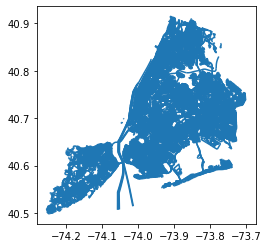

In [45]:
streets.plot()

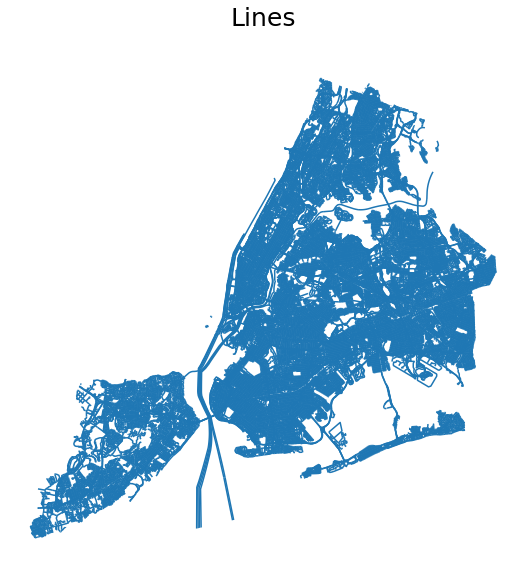

In [46]:
fig, ax = plt.subplots(figsize=(8,8))

streets = streets.to_crs(epsg=2263) 
streets.plot(ax=ax, 
             color='#1f77b4')

ax.set_title('Lines', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.3 Polygons

In [47]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

<AxesSubplot:>

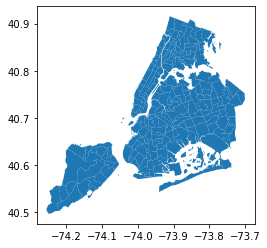

In [48]:
nta_shape.plot()

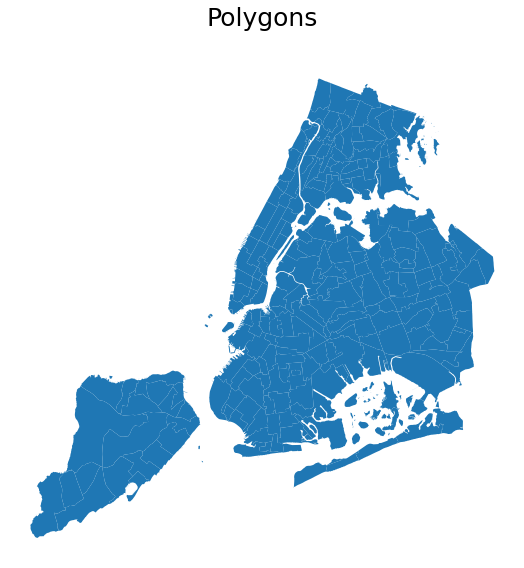

In [49]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.plot(ax=ax, 
               color='#1f77b4') 

ax.set_title('Polygons', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.4 Maps with Layers

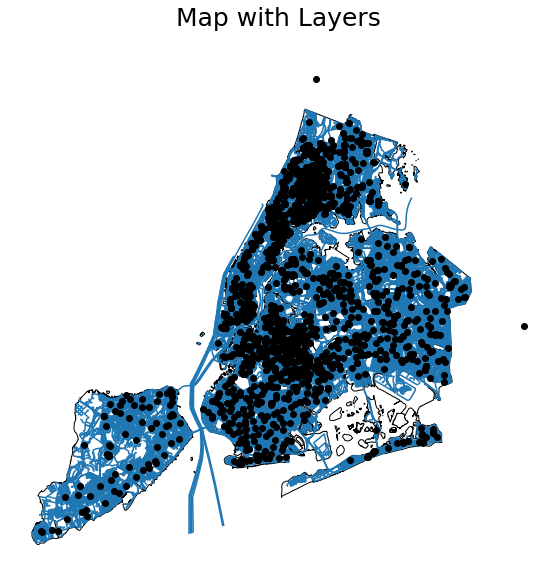

In [50]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1) # the order they should be plotted

streets.plot(ax=ax, 
             zorder=2)

school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)

ax.set_title('Map with Layers', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.5 Adding Background Map

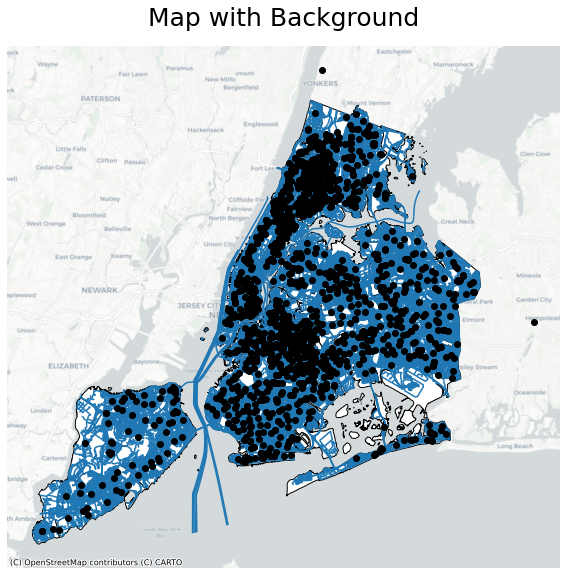

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1)

streets.plot(ax=ax, 
             zorder=2)

school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)
# adding basemap
ctx.add_basemap(ax, 
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)


ax.set_title('Map with Background', pad=20, fontsize=25)
plt.axis('off')
plt.tight_layout()

## 5.6 Clip Data

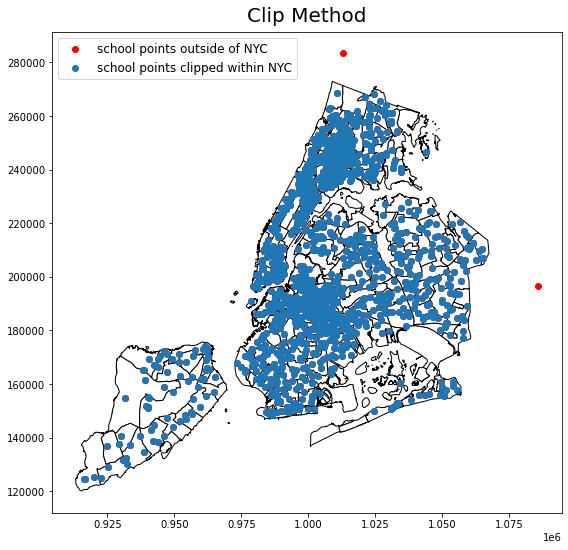

In [52]:
# clipping the school points that only fall within the nta shapes
school_points_clipped = gpd.clip(school_points, nta_shape)

fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax, 
               color="white", 
               edgecolor='black', 
               zorder=0)    

# plotting all points
school_points.plot(ax=ax, 
                   color='red', 
                   zorder=1,
                   label='school points outside of NYC')

# plotting only the clipped points
school_points_clipped.plot(ax=ax, 
                           color='#1f77b4', 
                           zorder=2, 
                           label='school points clipped within NYC')

ax.set_title('Clip Method', pad=10, fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

# 6. Joining Data

## 6.1 Attribute Join

In [53]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [54]:
# reading in population by nta data
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [55]:
print(nyc_pop['Year'].unique())

# only saving data from year 2010; dropping year 2000 records
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print('select one year: {}'.format(nyc_pop['Year'].unique()))

[2000 2010]
select one year: [2010]


In [56]:
nta_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      195 non-null    object  
 1   shape_area   195 non-null    object  
 2   county_fips  195 non-null    object  
 3   ntaname      195 non-null    object  
 4   shape_leng   195 non-null    object  
 5   boro_name    195 non-null    object  
 6   boro_code    195 non-null    object  
 7   geometry     195 non-null    geometry
dtypes: geometry(1), object(7)
memory usage: 12.3+ KB


In [57]:
# merging our nta shape data with the population data
nta_with_pop = nta_shape.merge(nyc_pop, 
                               left_on='ntacode', 
                               right_on='NTA Code')

nta_with_pop.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...   
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...   
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...   

    Borough  Year  FIPS County Code NTA Code               NTA Name  \
0    Queens  2010                81     QN08             St. Albans   
1  Brooklyn  2010                47     BK69           Clinton Hill   
2  Brooklyn  2010                47     BK46    Ocean Parkway South   
3     Bronx  2010                 5     BX28  Van Cortlandt Village   
4    Queens  2010                81     QN55       South Ozone Park   

   Population  
0       48593  
1       34791  
2       20299  
3       50100  
4       75878

In [58]:
# now our nta shape has the new columns from our population data
nta_with_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ntacode           195 non-null    object  
 1   shape_area        195 non-null    object  
 2   county_fips       195 non-null    object  
 3   ntaname           195 non-null    object  
 4   shape_leng        195 non-null    object  
 5   boro_name         195 non-null    object  
 6   boro_code         195 non-null    object  
 7   geometry          195 non-null    geometry
 8   Borough           195 non-null    object  
 9   Year              195 non-null    int64   
 10  FIPS County Code  195 non-null    int64   
 11  NTA Code          195 non-null    object  
 12  NTA Name          195 non-null    object  
 13  Population        195 non-null    int64   
dtypes: geometry(1), int64(3), object(10)
memory usage: 22.9+ KB


## 6.2 Spatial Join

In [59]:
# reading in nta shape data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [60]:
# reading in schools points data
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

In [61]:
# identifying the CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
# identifying the CRS
school_points.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [63]:
# changing CRS so they both match
nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [64]:
school_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ATS_CODE    1707 non-null   object  
 1   BORO        1693 non-null   object  
 2   BORONUM     1709 non-null   float64 
 3   LOC_CODE    1709 non-null   object  
 4   SCHOOLNAME  1709 non-null   object  
 5   SCH_TYPE    1709 non-null   object  
 6   MANAGED_BY  1709 non-null   int64   
 7   GEO_DISTRI  1709 non-null   int64   
 8   ADMIN_DIST  1709 non-null   int64   
 9   ADDRESS     1709 non-null   object  
 10  STATE_CODE  1709 non-null   object  
 11  ZIP         1709 non-null   int64   
 12  PRINCIPAL   1693 non-null   object  
 13  PRIN_PH     1694 non-null   object  
 14  FAX         1657 non-null   object  
 15  GRADES      1708 non-null   object  
 16  City        1709 non-null   object  
 17  geometry    1709 non-null   geometry
dtypes: float64(1), geometry(1), int64(4), ob

In [65]:
# spatial join nta data to the school points data with operation = 'intersects'
school_points_with_nta = gpd.sjoin(school_points, 
                                   nta_shape, 
                                   how="inner", 
                                   predicate='intersects')

school_points_with_nta.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0    15K001          K      2.0     K001   
36   15K136          K      2.0     K136   
65   15K172          K      2.0     K172   
168  15K295          K      2.0     K295   
222  75K371          K      2.0     K371   

                               SCHOOLNAME                         SCH_TYPE  \
0                     P.S. 001 THE BERGEN                       Elementary   
36              I.S. 136 CHARLES O. DEWEY  Junior High-Intermediate-Middle   
65   P.S. 172 BEACON SCHOOL OF EXCELLENCE                       Elementary   
168                              P.S. 295                       Elementary   
222         P.S. 371 - LILLIAN L. RASHKIS                      High school   

     MANAGED_BY  GEO_DISTRI  ADMIN_DIST        ADDRESS  ...      City  \
0             1          15          15  309 47 STREET  ...  BROOKLYN   
36            1          15          15  4004 4 AVENUE  ...  BROOKLYN   
65            1          15          15   825 4 AVENUE  ...  BROOKLYN   
168           1          15          15  330 18 STREET  ...  BROOKLYN   
222           1          15          75  355 37 STREET  ...  BROOKLYN   

                          geometry index_right ntacode     shape_area  \
0    POINT (980985.054 175780.759)         164    BK32  49955446.0216   
36   POINT (982218.628 176813.496)         164    BK32  49955446.0216   
65   POINT (984158.590 178921.890)         164    BK32  49955446.0216   
168  POINT (987330.493 180120.659)         164    BK32  49955446.0216   
222  POINT (982776.837 177607.547)         164    BK32  49955446.0216   

    county_fips           ntaname     shape_leng  boro_name boro_code  
0           047  Sunset Park West  83039.1760863   Brooklyn         3  
36          047  Sunset Park West  83039.1760863   Brooklyn         3  
65          047  Sunset Park West  83039.1760863   Brooklyn         3  
168         047  Sunset Park West  83039.1760863   Brooklyn         3  
222         047  Sunset Park West  83039.1760863   Brooklyn         3  

[5 rows x 26 columns]

In [66]:
school_points_with_nta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1707 entries, 0 to 1615
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ATS_CODE     1707 non-null   object  
 1   BORO         1691 non-null   object  
 2   BORONUM      1707 non-null   float64 
 3   LOC_CODE     1707 non-null   object  
 4   SCHOOLNAME   1707 non-null   object  
 5   SCH_TYPE     1707 non-null   object  
 6   MANAGED_BY   1707 non-null   int64   
 7   GEO_DISTRI   1707 non-null   int64   
 8   ADMIN_DIST   1707 non-null   int64   
 9   ADDRESS      1707 non-null   object  
 10  STATE_CODE   1707 non-null   object  
 11  ZIP          1707 non-null   int64   
 12  PRINCIPAL    1693 non-null   object  
 13  PRIN_PH      1693 non-null   object  
 14  FAX          1656 non-null   object  
 15  GRADES       1706 non-null   object  
 16  City         1707 non-null   object  
 17  geometry     1707 non-null   geometry
 18  index_right  1707 no

<AxesSubplot:>

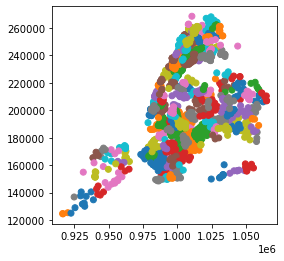

In [67]:
# school points data now has nta information
school_points_with_nta.plot(column='ntaname')

# 7. Indexing and Selecting Data

In [68]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

<AxesSubplot:>

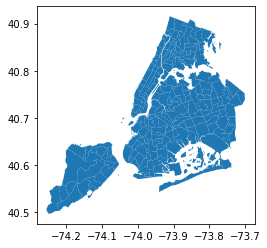

In [69]:
nta_shape.plot()

In [70]:
# slicing the nta data with everything up to lon = -74.1
nta_shape = nta_shape.cx[:-74.1, :]
nta_shape.head()

ntacode     shape_area county_fips  \
50    SI07  63256575.2896         085   
51    SI22  56028570.7706         085   
59    SI54  89611143.5336         085   
60    SI11  145533838.268         085   
62    SI08  37752289.0757         085   

                                      ntaname     shape_leng      boro_name  \
50                                Westerleigh  41655.7048171  Staten Island   
51  West New Brighton-New Brighton-St. George  66052.5937572  Staten Island   
59                                Great Kills  66104.6564522  Staten Island   
60     Charleston-Richmond Valley-Tottenville  84983.6813391  Staten Island   
62              Grymes Hill-Clifton-Fox Hills  37119.8869851  Staten Island   

   boro_code                                           geometry  
50         5  MULTIPOLYGON (((-74.13047 40.63089, -74.13014 ...  
51         5  MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...  
59         5  MULTIPOLYGON (((-74.14439 40.56971, -74.14287 ...  
60         5  MULTIPOLYGON (((-74.20700 40.55757, -74.20880 ...  
62         5  MULTIPOLYGON (((-74.08155 40.60629, -74.08281 ...

<AxesSubplot:>

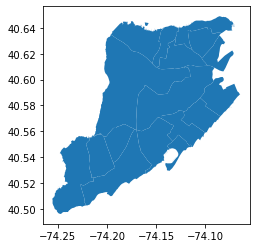

In [71]:
nta_shape.plot()

In [72]:
# slicing the nta data with everything up to lon = -74.1 and everything after lat = 40.56
nta_shape = nta_shape.cx[:-74.1, 40.56:]
nta_shape.head()

ntacode     shape_area county_fips  \
50    SI07  63256575.2896         085   
51    SI22  56028570.7706         085   
59    SI54  89611143.5336         085   
62    SI08  37752289.0757         085   
63    SI35  47137508.4989         085   

                                      ntaname     shape_leng      boro_name  \
50                                Westerleigh  41655.7048171  Staten Island   
51  West New Brighton-New Brighton-St. George  66052.5937572  Staten Island   
59                                Great Kills  66104.6564522  Staten Island   
62              Grymes Hill-Clifton-Fox Hills  37119.8869851  Staten Island   
63                   New Brighton-Silver Lake  30320.3628075  Staten Island   

   boro_code                                           geometry  
50         5  MULTIPOLYGON (((-74.13047 40.63089, -74.13014 ...  
51         5  MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...  
59         5  MULTIPOLYGON (((-74.14439 40.56971, -74.14287 ...  
62         5  MULTIPOLYGON (((-74.08155 40.60629, -74.08281 ...  
63         5  MULTIPOLYGON (((-74.08373 40.63574, -74.08395 ...

<AxesSubplot:>

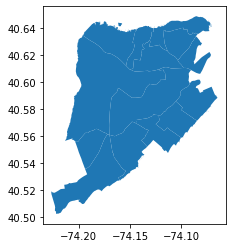

In [73]:
nta_shape.plot()

# 8. Coordinate Reference Systems

In [74]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [75]:
# checking the current CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

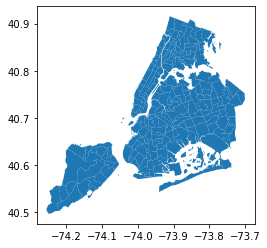

In [76]:
nta_shape.plot()

In [77]:
# switching CRS of nta to epsg = 2263
nta_shape.to_crs(epsg=2263, inplace=True)

nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

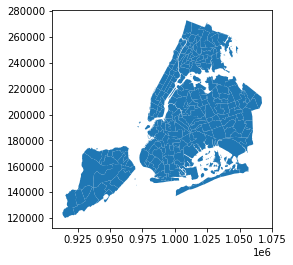

In [78]:
nta_shape.plot()

# 9. Types of Maps

In [79]:
# reading in nyc nta population data as 'nyc_pop'
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [80]:
nyc_pop['Year'].unique()

array([2000, 2010])

In [81]:
# saving only the population numbers for the year 2010
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

nyc_pop['Year'].unique()

array([2010])

In [82]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [83]:
# joining our nta population data to our nta shapes data
nta_pop = nta_shape.merge(nyc_pop, 
                          left_on='ntacode', 
                          right_on='NTA Code', 
                          how='inner')

nta_pop.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...   
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...   
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...   

    Borough  Year  FIPS County Code NTA Code               NTA Name  \
0    Queens  2010                81     QN08             St. Albans   
1  Brooklyn  2010                47     BK69           Clinton Hill   
2  Brooklyn  2010                47     BK46    Ocean Parkway South   
3     Bronx  2010                 5     BX28  Van Cortlandt Village   
4    Queens  2010                81     QN55       South Ozone Park   

   Population  
0       48593  
1       34791  
2       20299  
3       50100  
4       75878

In [84]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
nta_pop = nta_pop.to_crs(epsg=2263)

nta_pop.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [86]:
# returning the area of our nta as a new column 'sq_ft'
nta_pop['sq_ft'] = nta_pop.area

nta_pop.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....   
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...   
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...   

    Borough  Year  FIPS County Code NTA Code               NTA Name  \
0    Queens  2010                81     QN08             St. Albans   
1  Brooklyn  2010                47     BK69           Clinton Hill   
2  Brooklyn  2010                47     BK46    Ocean Parkway South   
3     Bronx  2010                 5     BX28  Van Cortlandt Village   
4    Queens  2010                81     QN55       South Ozone Park   

   Population         sq_ft  
0       48593  7.741292e+07  
1       34791  2.052830e+07  
2       20299  1.778215e+07  
3       50100  2.566604e+07  
4       75878  8.246160e+07

In [87]:
# converting square feet to square miles and saving as a new column
nta_pop['sq_mi'] = nta_pop['sq_ft'] / 27878400

nta_pop.head()   

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....   
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...   
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...   

    Borough  Year  FIPS County Code NTA Code               NTA Name  \
0    Queens  2010                81     QN08             St. Albans   
1  Brooklyn  2010                47     BK69           Clinton Hill   
2  Brooklyn  2010                47     BK46    Ocean Parkway South   
3     Bronx  2010                 5     BX28  Van Cortlandt Village   
4    Queens  2010                81     QN55       South Ozone Park   

   Population         sq_ft     sq_mi  
0       48593  7.741292e+07  2.776806  
1       34791  2.052830e+07  0.736351  
2       20299  1.778215e+07  0.637847  
3       50100  2.566604e+07  0.920643  
4       75878  8.246160e+07  2.957903

In [88]:
# creating a new column of the population density (pop/area) of each nta
nta_pop['density (pop/sq_mi)'] = nta_pop['Population'] / nta_pop['sq_mi']

nta_pop.sort_values(by='density (pop/sq_mi)', ascending=False).iloc[:5,-6:]

NTA Code         NTA Name  Population         sq_ft     sq_mi  \
32      MN32        Yorkville       77942  1.364822e+07  0.489563   
151     BX40    Fordham South       28262  6.308875e+06  0.226300   
56      MN22     East Village       44136  1.089429e+07  0.390779   
174     MN14   Lincoln Square       61489  1.580585e+07  0.566957   
7       MN12  Upper West Side      132378  3.437994e+07  1.233211   

     density (pop/sq_mi)  
32         159207.407621  
151        124887.463830  
56         112943.709343  
174        108454.447807  
7          107344.191541

## 9.1 Choropleth Maps

<AxesSubplot:>

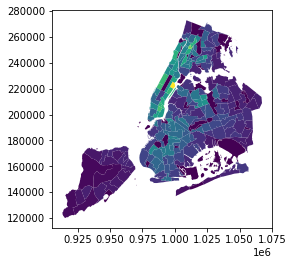

In [89]:
# plotting a choropleth map on the column 'density (pop/sq_mi)'
nta_pop.plot(column='density (pop/sq_mi)')

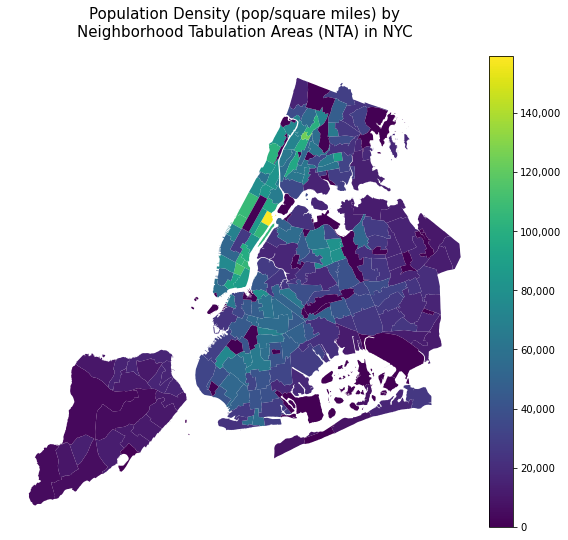

In [90]:
fig, ax = plt.subplots(figsize=(8,8))

# saving variable to format integers as strings with commas
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

# resizing the color bar to scale to the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# plotting 'density (pop/sq_mi)' as a choropleth map
nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, # plotting on the generated axis
             cax=cax, # legend of the color bar
             legend=True, # turning on legend
             legend_kwds={'format':comma_fmt}) # formatting the color map legend with thousand separator

# setting title
ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

ax.axis('off')
plt.tight_layout()

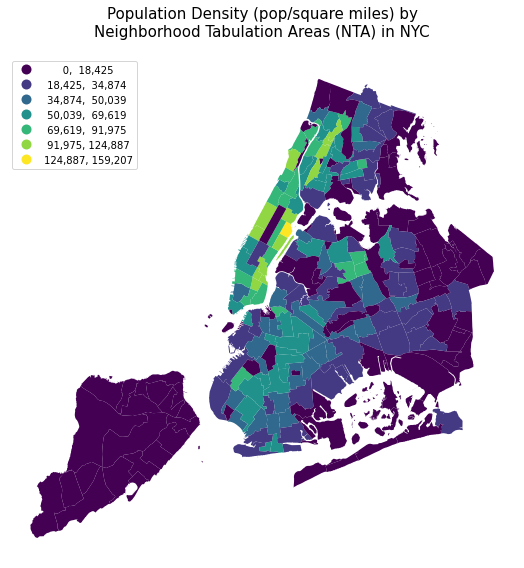

In [91]:
fig, ax = plt.subplots(figsize=(8,8))

nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k=7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "10"})     
        
ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

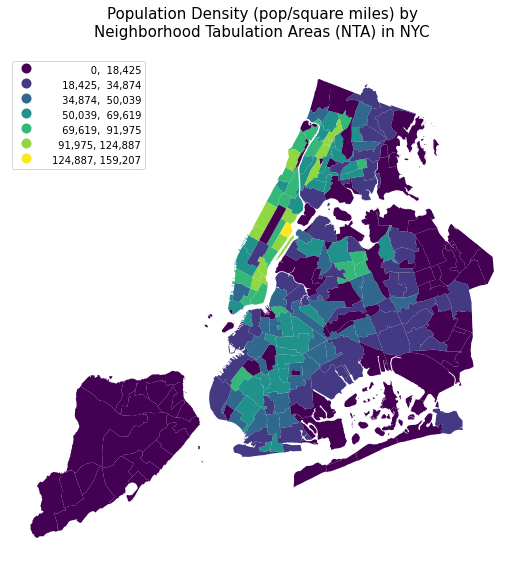

In [92]:
# align legend numbers

fig, ax = plt.subplots(figsize=(8,8))

nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k=7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "10"})

# returning the legend
leg = ax.get_legend()

# making the legend labels right horizontal aligned
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(125)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"     
        
ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

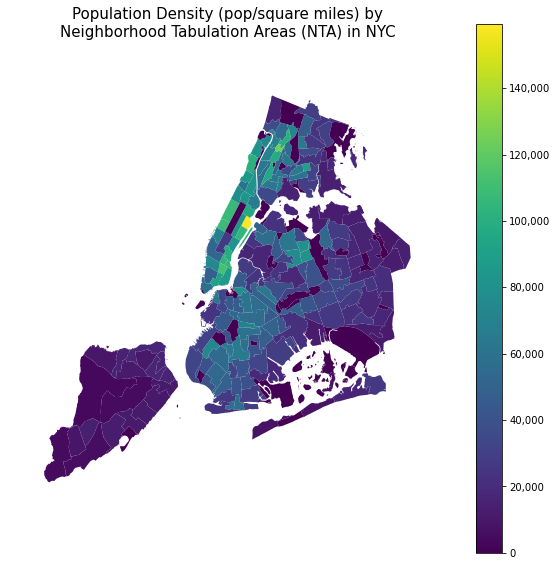

In [93]:
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     edgecolor='None', 
                     linewidth=1,
                     cmap='viridis',
                     legend=True,
                     legend_kwargs={'format': comma_fmt},
                     figsize=(8,8),
                     zorder=0)

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=1,
              edgecolor='None')

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

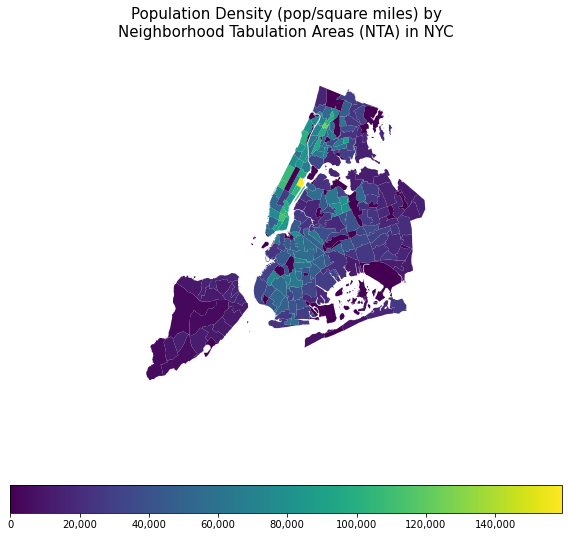

In [94]:
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     edgecolor='None', 
                     linewidth=1,
                     cmap='viridis',
                     legend=True,
                     legend_kwargs={'format': comma_fmt,
                                    'orientation': 'horizontal'},
                     figsize=(8,8),
                     zorder=0)

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=1,
              edgecolor='None')

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

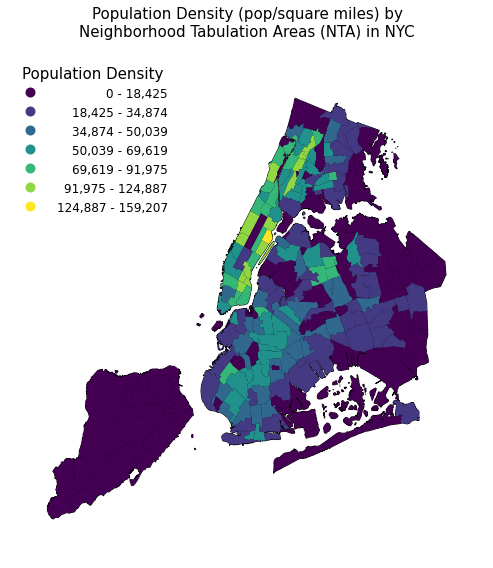

In [95]:
# setting the map classifier as Fisher Jenks with 7 classes
scheme = mc.FisherJenks(nta_pop['density (pop/sq_mi)'], k=7)

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     cmap='viridis',
                     legend=True, 
                     legend_kwargs={'frameon': False, 
                                    'loc': 'upper left', 
                                    'fontsize':'large', 
                                    'title':'Population Density',
                                    'title_fontsize':'15'},
                     scheme=scheme, 
                     figsize=(8,8),
                     zorder=1)

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=0)

leg = ax.get_legend()

# formatting the legend label numbers with thousand separators
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)
    
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(150)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"    

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)
plt.axis('off')
plt.tight_layout()

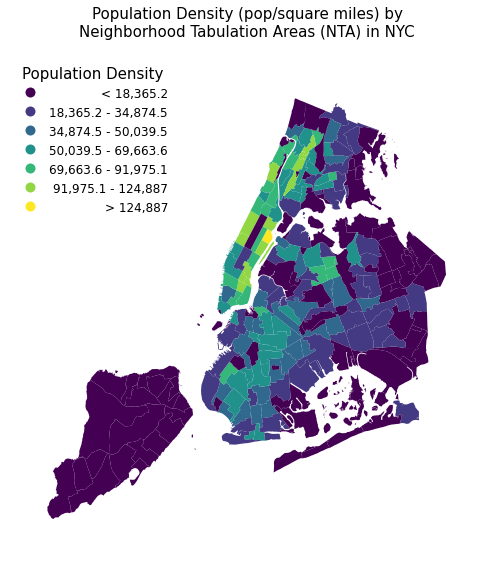

In [96]:
scheme = mc.FisherJenks(nta_pop['density (pop/sq_mi)'], k=7)

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     cmap='viridis',
                     legend=True, 
                     legend_kwargs={'frameon': False, 
                                    'loc': 'upper left', 
                                    'fontsize':'large', 
                                    'title':'Population Density',
                                    'title_fontsize':'15'},
                     scheme=scheme, 
                     figsize=(8,8),
                     
                     # manually setting legend labels
                     legend_labels=[
                                    '< 18,365.2', 
                                    '18,365.2 - 34,874.5', 
                                    '34,874.5 - 50,039.5',
                                    '50,039.5 - 69,663.6', 
                                    '69,663.6 - 91,975.1',
                                    '91,975.1 - 124,887',
                                    '> 124,887',
                                    ])

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=0,
              edgecolor='None')

leg = ax.get_legend()
    
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(150)  # need to adapt this manually
        row.mode= "expand"
        row.align="right" 

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)
plt.axis('off')
plt.tight_layout()

## 9.2 Heat Maps

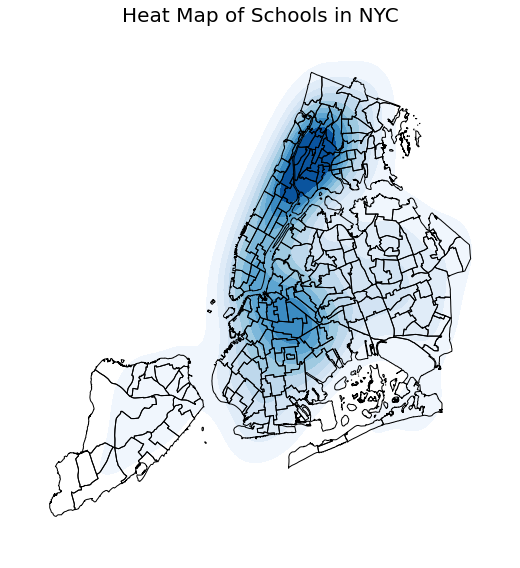

In [97]:
ax = gplt.kdeplot(school_points.to_crs(4326),
                  shade=True, 
                  cmap='Blues',
                  projection=gplt.crs.AlbersEqualArea(), 
                  figsize=(8,8))

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=1)

ax.set_title('Heat Map of Schools in NYC', fontsize=20)
plt.axis('off')
plt.tight_layout()

## 9.3 Hexbin Map

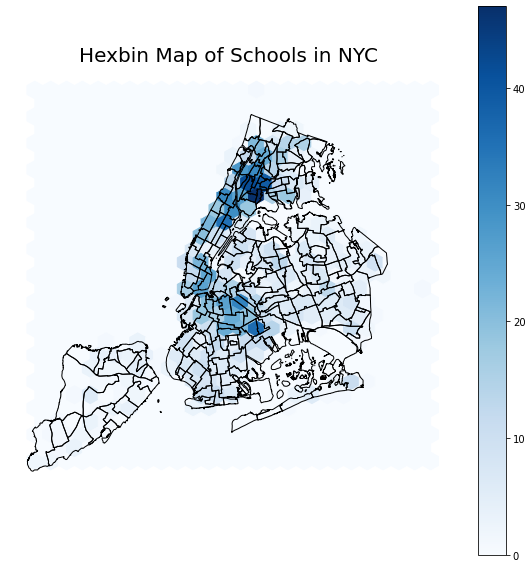

In [98]:
fig, ax = plt.subplots(figsize=(8,8))

school_points['x'] = school_points['geometry'].x
school_points['y'] = school_points['geometry'].y
df = pd.DataFrame(school_points)

df.plot.hexbin(x='x', 
               y='y', 
               gridsize=25, 
               ax=ax,
               cmap='Blues')


nta_shape.to_crs(epsg=2263).plot(ax=ax, 
                                 color='None', 
                                 edgecolor='black', 
                                 cax=cax)

ax.set_title('Hexbin Map of Schools in NYC', fontsize=20, pad=10)
plt.axis('off')
plt.tight_layout()

## 9.4 Proportional Symbol Map

In [99]:
nta_pop['centroid'] = nta_pop.centroid
nta_pop = nta_pop.set_geometry('centroid')

nta_pop.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....   
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...   
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...   

    Borough  Year  FIPS County Code NTA Code               NTA Name  \
0    Queens  2010                81     QN08             St. Albans   
1  Brooklyn  2010                47     BK69           Clinton Hill   
2  Brooklyn  2010                47     BK46    Ocean Parkway South   
3     Bronx  2010                 5     BX28  Van Cortlandt Village   
4    Queens  2010                81     QN55       South Ozone Park   

   Population         sq_ft     sq_mi  density (pop/sq_mi)  \
0       48593  7.741292e+07  2.776806         17499.599134   
1       34791  2.052830e+07  0.736351         47247.829471   
2       20299  1.778215e+07  0.637847         31824.252150   
3       50100  2.566604e+07  0.920643         54418.515399   
4       75878  8.246160e+07  2.957903         25652.634505   

                         centroid  
0  POINT (1049933.729 191188.768)  
1   POINT (994687.841 189923.623)  
2   POINT (992488.356 164182.300)  
3  POINT (1013115.278 258632.519)  
4  POINT (1034328.472 185669.737)

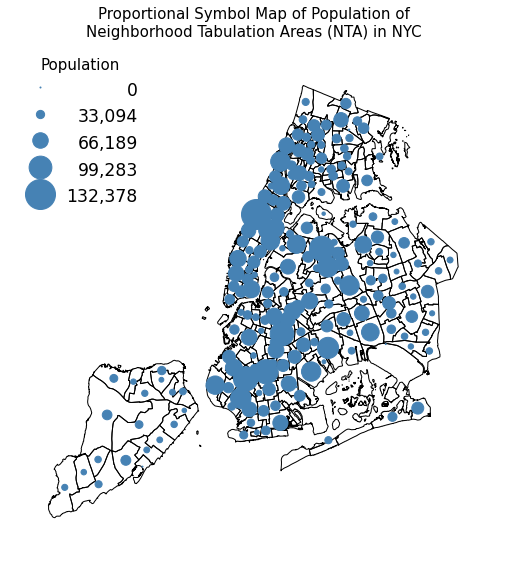

In [100]:
ax = gplt.pointplot(nta_pop.set_geometry('centroid').to_crs(4326), 
                    projection=gcrs.AlbersEqualArea(),
                    figsize=(8,8),
                    scale='Population', 
                    limits=(1, 30), 
                    legend=True,
                    legend_kwargs={'frameon': False, 
                                   'loc': 'upper left', 
                                   'fontsize':'xx-large', 
                                   'title':'Population',
                                   'title_fontsize':'15'})

gplt.polyplot(nta_shape.to_crs(4326), 
              projection=gcrs.AlbersEqualArea(),
              ax=ax)

leg = ax.get_legend()

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    new_text = f'{int(lower):,.0f}'
    lbl.set_text(new_text)

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115) 
        row.mode= "expand"
        row.align="right"

ax.set_title('Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15)
plt.axis('off')
plt.tight_layout()

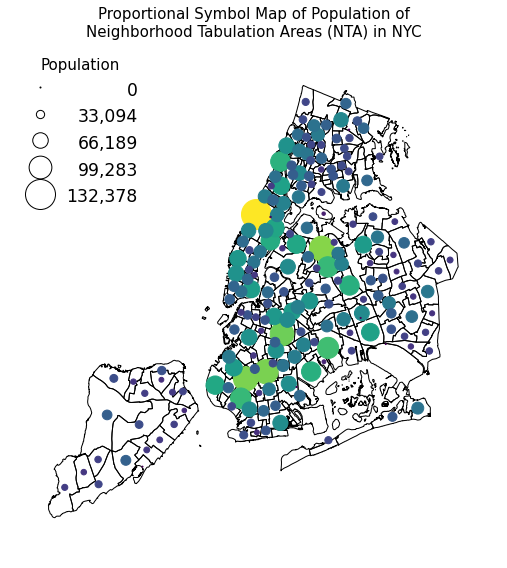

In [101]:
ax = gplt.pointplot(nta_pop.set_geometry('centroid').to_crs(4326), 
                    projection=gcrs.AlbersEqualArea(),
                    figsize=(8,8),
                    hue='Population', 
                    scale='Population',
                    legend_var='scale',
                    limits=(1, 30),
                    legend=True,
                    legend_kwargs={'frameon': False, 
                                   'loc': 'upper left', 
                                   'fontsize':'xx-large', 
                                   'title':'Population',
                                   'title_fontsize':'15'})

gplt.polyplot(nta_shape.to_crs(4326), 
              projection=gcrs.AlbersEqualArea(),
              ax=ax)

leg = ax.get_legend()

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    new_text = f'{int(lower):,.0f}'
    lbl.set_text(new_text) 

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115) 
        row.mode= "expand"
        row.align="right"
        
ax.set_title('Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15)
plt.axis('off')
plt.tight_layout()

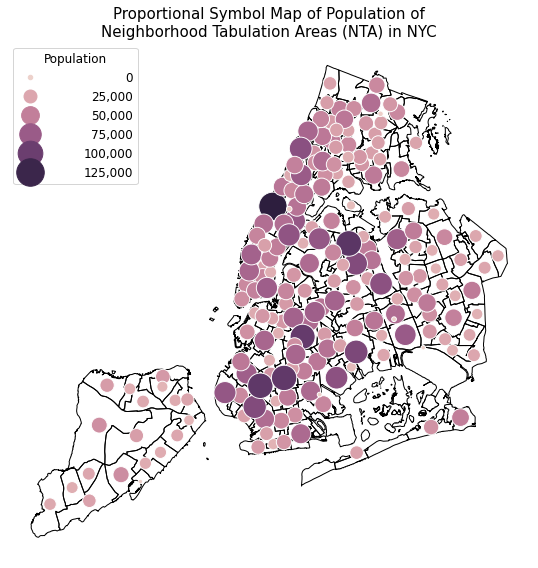

In [102]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.scatterplot(x=nta_pop['centroid'].x,
                     y=nta_pop['centroid'].y, 
                     data=nta_pop, 
                     size="Population",
                     hue='Population',
                     sizes=(20, 800))

nta_shape.to_crs(epsg=2263).plot(ax=ax, 
                                 color='None', 
                                 edgecolor='black',
                                 zorder=0)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
       
for i in range(len(current_labels)):
    current_labels[i] = int(current_labels[i])
    current_labels[i] = "{:,}".format((current_labels[i])) 
    

leg = ax.legend(current_handles, current_labels, 
                loc='upper left', 
                fontsize='large', 
                title='Population',  
                title_fontsize=12)

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115)
        row.mode= "expand"
        row.align="right"

ax.set_title('Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15)
plt.axis('off')
plt.tight_layout()

## 9.5 Voroni Map

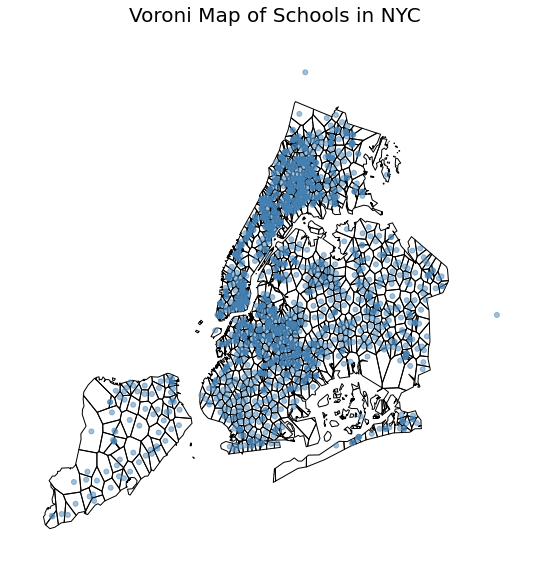

In [103]:
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = gplt.voronoi(school_points.to_crs(4326), 
                  projection=gcrs.AlbersEqualArea(),
                  clip=boros.to_crs(4326).simplify(0.001),
                  figsize=(8,8),
                  zorder=0)

gplt.pointplot(school_points.to_crs(4326), 
               alpha=.5,
               ax=ax)

ax.set_title('Voroni Map of Schools in NYC', fontsize=20)
plt.tight_layout()

## 9.6 Quadtree Map

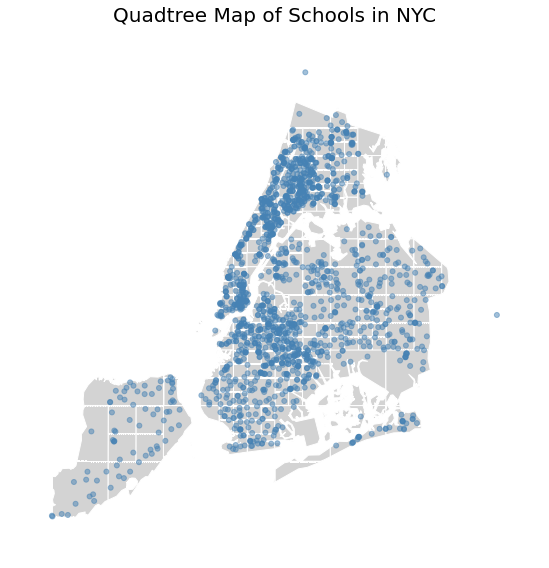

In [104]:
# reading in nyc boros geodataframe
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = gplt.quadtree(school_points.to_crs(4326), 
                   nmax=1,
                   projection=gcrs.AlbersEqualArea(), 
                   
                   # clipping quadtree map to boros shape
                   clip=boros.to_crs(4326).simplify(0.001),
                   facecolor='lightgray', 
                   edgecolor='white', 
                   figsize=(8,8),
                   zorder=0)

gplt.pointplot(school_points.to_crs(4326), 
               alpha=.5,
               ax=ax)

ax.set_title('Quadtree Map of Schools in NYC', fontsize=20)
ax.set_aspect('equal', 'box')
plt.tight_layout()

# 10. Relationship Tests

In [105]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)
nta_shape['centroid_column'] = nta_shape.centroid

nta_shape.head()

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_46579/2481497955.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['centroid_column'] = nta_shape.centroid


ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...   
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...   
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...   

              centroid_column  
0  POINT (-73.76315 40.69120)  
1  POINT (-73.96236 40.68797)  
2  POINT (-73.97033 40.61731)  
3  POINT (-73.89562 40.87651)  
4  POINT (-73.81946 40.67616)

In [106]:
# checking if our shape contains its centroid
nta_shape['geometry'].contains(nta_shape['centroid_column']).value_counts()

True     186
False      9
dtype: int64

In [107]:
# checking to see if our centroid is within its shape
nta_shape['centroid_column'].within(nta_shape['geometry']).value_counts()

True     186
False      9
dtype: int64

In [108]:
# checking if our representative point is within its shape
nta_shape.representative_point().within(nta_shape['geometry']).value_counts()

True    195
dtype: int64

In [109]:
# checking to see if our centroid intersects with its shape
nta_shape['centroid_column'].intersects(nta_shape['geometry']).value_counts()

True     186
False      9
dtype: int64

In [110]:
# making a new column called 'within' that identifies if our centroid is within its shape
nta_shape['within'] = nta_shape.centroid_column.within(nta_shape['geometry'])

# printing the shape and head of centroids not within their shapes
print(nta_shape[nta_shape['within'] == False].shape)
nta_shape[nta_shape['within'] == False].head()

(9, 10)


ntacode     shape_area county_fips  \
51     SI22  56028570.7706         085   
65     QN10  99604665.5481         081   
67     BX10  40222474.0094         005   
84     SI37  46443381.3461         085   
134    BX03  40264969.7671         005   

                                               ntaname     shape_leng  \
51           West New Brighton-New Brighton-St. George  66052.5937572   
65   Breezy Point-Belle Harbor-Rockaway Park-Broad ...  114641.363286   
67                 Pelham Bay-Country Club-City Island  138105.623547   
84                                  Stapleton-Rosebank  55206.4190311   
134                    Eastchester-Edenwald-Baychester  59283.8778905   

         boro_name boro_code  \
51   Staten Island         5   
65          Queens         4   
67           Bronx         2   
84   Staten Island         5   
134          Bronx         2   

                                              geometry  \
51   MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...   
65   MULTIPOLYGON (((-73.88347 40.56848, -73.88337 ...   
67   MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...   
84   MULTIPOLYGON (((-74.07258 40.63794, -74.07257 ...   
134  MULTIPOLYGON (((-73.79323 40.88282, -73.79417 ...   

                centroid_column  within  
51   POINT (-74.10231 40.63897)   False  
65   POINT (-73.87647 40.57148)   False  
67   POINT (-73.80649 40.84660)   False  
84   POINT (-74.07370 40.61872)   False  
134  POINT (-73.83664 40.88094)   False

In [111]:
# returning the count of unique values of centroids not within their shapes
nta_shape[nta_shape['within'] == False]['ntaname'].value_counts()

West New Brighton-New Brighton-St. George                1
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    1
Pelham Bay-Country Club-City Island                      1
Stapleton-Rosebank                                       1
Eastchester-Edenwald-Baychester                          1
park-cemetery-etc-Bronx                                  1
park-cemetery-etc-Queens                                 1
park-cemetery-etc-Brooklyn                               1
park-cemetery-etc-Manhattan                              1
Name: ntaname, dtype: int64

In [112]:
# saving centroids that are not within their shapes as a new dataframe called 'multi_shapes'
multi_shapes = nta_shape[nta_shape['within'] == False]

multi_shapes[['ntaname', 'geometry']]

ntaname  \
51           West New Brighton-New Brighton-St. George   
65   Breezy Point-Belle Harbor-Rockaway Park-Broad ...   
67                 Pelham Bay-Country Club-City Island   
84                                  Stapleton-Rosebank   
134                    Eastchester-Edenwald-Baychester   
141                            park-cemetery-etc-Bronx   
168                           park-cemetery-etc-Queens   
180                         park-cemetery-etc-Brooklyn   
184                        park-cemetery-etc-Manhattan   

                                              geometry  
51   MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...  
65   MULTIPOLYGON (((-73.88347 40.56848, -73.88337 ...  
67   MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...  
84   MULTIPOLYGON (((-74.07258 40.63794, -74.07257 ...  
134  MULTIPOLYGON (((-73.79323 40.88282, -73.79417 ...  
141  MULTIPOLYGON (((-73.86956 40.81616, -73.86954 ...  
168  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
180  MULTIPOLYGON (((-73.91513 40.58627, -73.91510 ...  
184  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...

In [113]:
multi_shapes = multi_shapes.to_crs(2263)

# Returns the union of the shape and their centroids to plot together.
multi_shapes.centroid.union(multi_shapes['geometry'])

51     GEOMETRYCOLLECTION (POLYGON ((963907.107 17169...
65     GEOMETRYCOLLECTION (POLYGON ((1016653.398 1463...
67     GEOMETRYCOLLECTION (POLYGON ((1042551.823 2433...
84     GEOMETRYCOLLECTION (POLYGON ((964108.221 17167...
134    GEOMETRYCOLLECTION (POLYGON ((1041167.248 2610...
141    GEOMETRYCOLLECTION (POLYGON ((1020359.713 2366...
168    GEOMETRYCOLLECTION (POLYGON ((970227.278 14564...
180    GEOMETRYCOLLECTION (POLYGON ((1007832.158 1528...
184    GEOMETRYCOLLECTION (POLYGON ((980940.486 18843...
dtype: geometry

# Identifying centroids not located within their shape

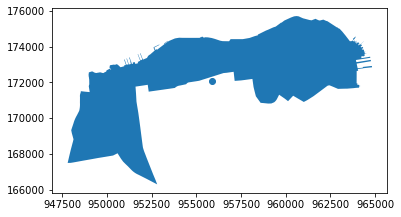

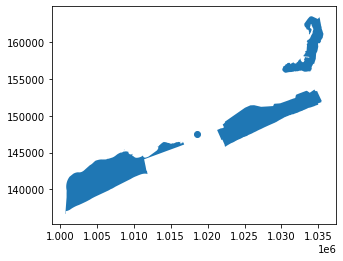

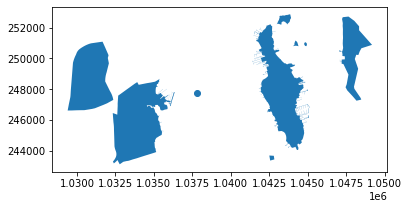

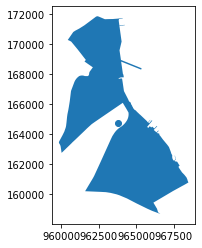

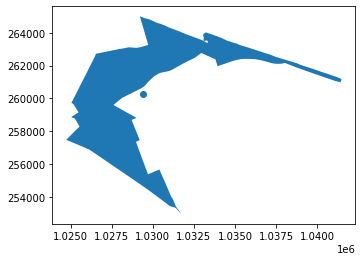

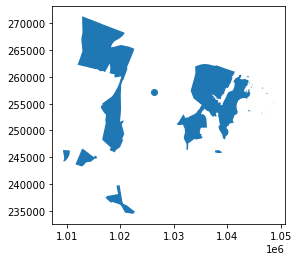

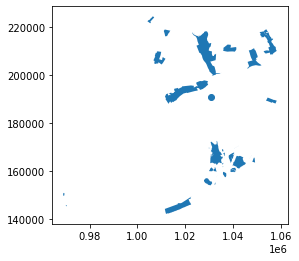

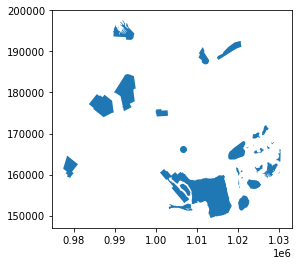

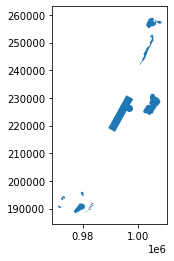

In [114]:
# saving the shape, centroid union as a new name called 'multi_shapes'
multi_shapes = multi_shapes.centroid.union(multi_shapes['geometry'])

# plotting the shapes and their centroids that do not fall within their shape
for i in range(len(multi_shapes)):
    multi_shapes.iloc[[i]].plot()

# 11. Set Operations with Overlay

In [115]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

In [116]:
# offsetting the nta data 10,000 feet east and north so we can perform overlay operations
# saving as a new column called 'offset'
nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape['offset'] = nta_shape.geometry.translate(10000, 10000)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....   
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...   
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...   

                                              offset  
0  MULTIPOLYGON (((1062996.196 206307.658, 106308...  
1  MULTIPOLYGON (((1007183.302 197255.730, 100720...  
2  MULTIPOLYGON (((1002370.385 177211.562, 100244...  
3  MULTIPOLYGON (((1025481.837 271490.578, 102548...  
4  MULTIPOLYGON (((1048120.503 198147.096, 104819...

Text(0.5, 1.0, 'Offset = 10,000 ft in both x and y directions')

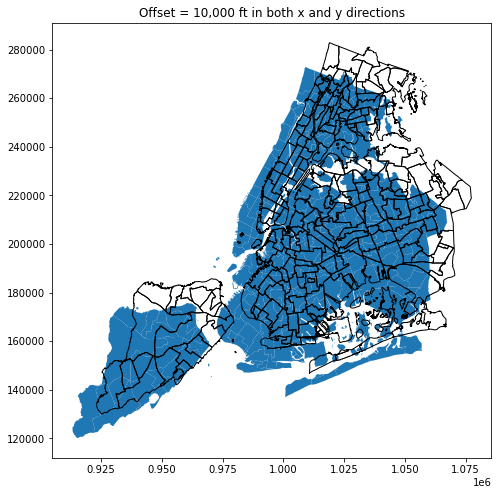

In [117]:
# previewing the new offset shape
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax)

nta_shape.set_geometry('offset').plot(ax=ax,
                                      color='none',
                                      edgecolor='black')

ax.set_title('Offset = 10,000 ft in both x and y directions')

<AxesSubplot:>

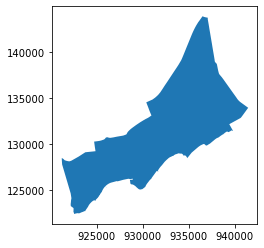

In [118]:
# we will use this nta shape to analyze overlay methods
nta_shape[nta_shape['ntacode'] == 'SI01'].plot()

In [119]:
nta_shape = nta_shape[nta_shape['ntacode'] == 'SI01']
nta_shape.head()

ntacode     shape_area county_fips  \
108    SI01  141191278.047         085   

                                        ntaname     shape_leng      boro_name  \
108  Annadale-Huguenot-Prince's Bay-Eltingville  71312.1647365  Staten Island   

    boro_code                                           geometry  \
108         5  MULTIPOLYGON (((937062.579 143742.649, 937060....   

                                                offset  
108  MULTIPOLYGON (((947062.579 153742.649, 947060....

In [120]:
offset = nta_shape.set_geometry('offset')
offset.head()

ntacode     shape_area county_fips  \
108    SI01  141191278.047         085   

                                        ntaname     shape_leng      boro_name  \
108  Annadale-Huguenot-Prince's Bay-Eltingville  71312.1647365  Staten Island   

    boro_code                                           geometry  \
108         5  MULTIPOLYGON (((937062.579 143742.649, 937060....   

                                                offset  
108  MULTIPOLYGON (((947062.579 153742.649, 947060....

Text(0.5, 1.0, 'Overlay = None (Original Shapes)')

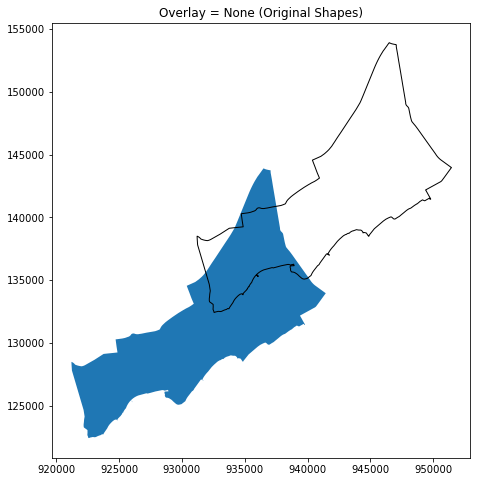

In [121]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax)

offset.plot(ax=ax, color='None', edgecolor='black')
ax.set_title('Overlay = None (Original Shapes)')

## 11.1 Union

Text(0.5, 1.0, 'Overlay = Union')

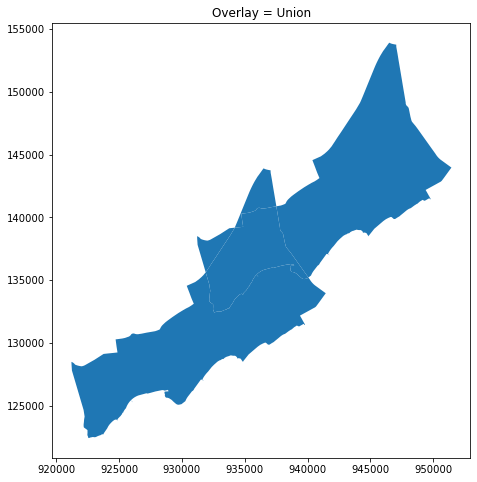

In [122]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing union overlay method
union = gpd.overlay(nta_shape, offset, how='union')
union.plot(ax=ax)
ax.set_title('Overlay = Union')

## 11.2 Intersection

Text(0.5, 1.0, 'Overlay = Intersection')

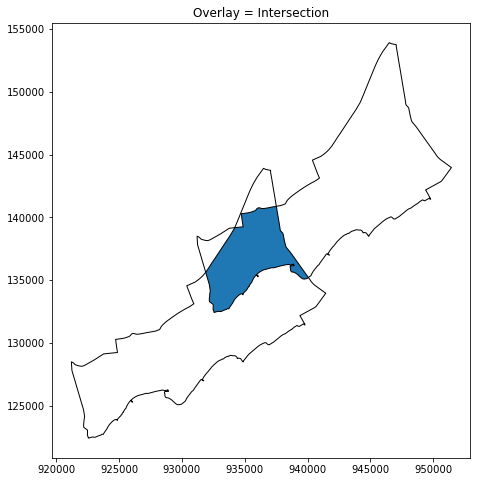

In [123]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing the intersection overlay method
intersection = gpd.overlay(nta_shape, offset, how='intersection')
intersection.plot(ax=ax)
offset.plot(ax=ax, color='None', edgecolor='black')
nta_shape.plot(ax=ax, color='None',  edgecolor='black')
ax.set_title('Overlay = Intersection')

## 11.3 Symmetric Difference

Text(0.5, 1.0, 'Overlay = Symmetric Difference')

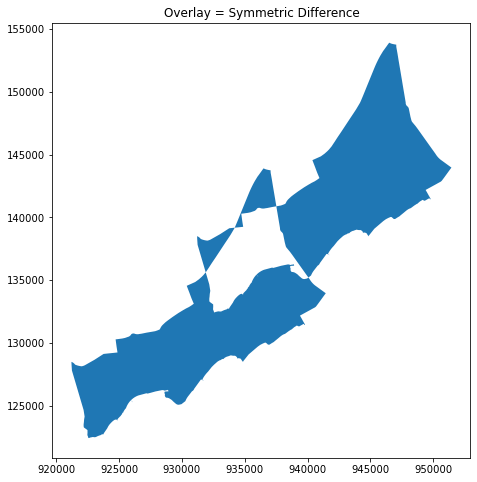

In [124]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing the symmetric_difference overlay method
symmetric_difference = gpd.overlay(nta_shape, offset, how='symmetric_difference')
symmetric_difference.plot(ax=ax)
ax.set_title('Overlay = Symmetric Difference')

## 11.4 Difference

Text(0.5, 1.0, 'Overlay = Difference')

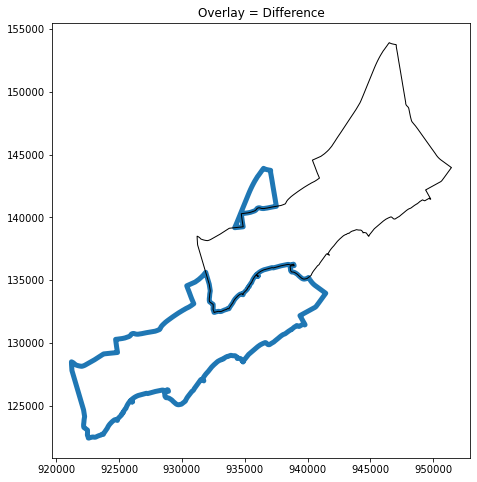

In [125]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# analyzing the difference overlay method
difference = gpd.overlay(nta_shape, offset, how='difference')
difference.plot(ax=ax, color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=ax, color='None', edgecolor='black', zorder=1)
ax.set_title('Overlay = Difference')

## 11.5 Identity

Text(0.5, 1.0, 'Overlay = Identity')

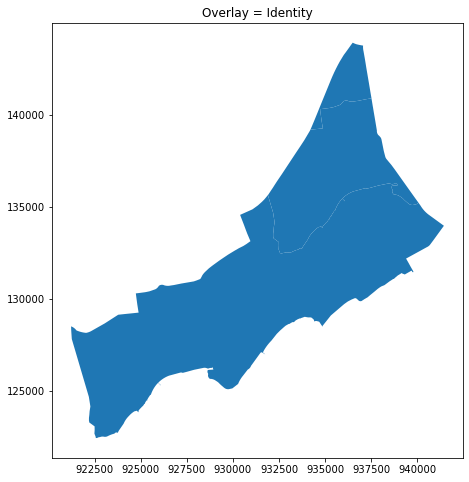

In [126]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing the identity overlay method
identity = gpd.overlay(nta_shape, offset, how='identity')
identity.plot(ax=ax)
ax.set_title('Overlay = Identity')

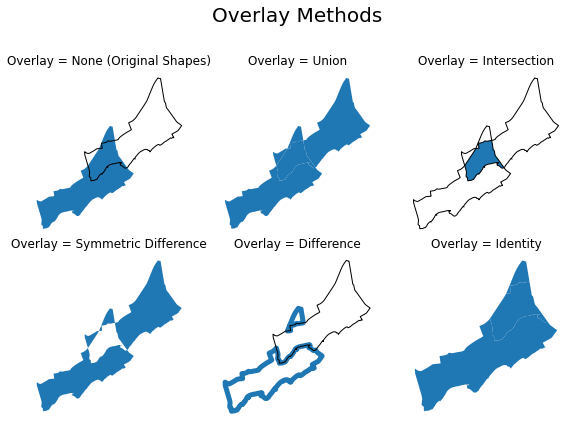

In [127]:
# plotting overlay methods
fig, axs = plt.subplots(2, 3, sharey=False, figsize=(8,6))

nta_shape.plot(ax=axs[0, 0])
offset.plot(ax=axs[0, 0], color='None', edgecolor='black')
axs[0, 0].set_title('Overlay = None (Original Shapes)')
axs[0, 0].axis('off')

union = gpd.overlay(nta_shape, offset, how='union')
union.plot(ax=axs[0, 1])
axs[0, 1].set_title('Overlay = Union')
axs[0, 1].axis('off')

intersection = gpd.overlay(nta_shape, offset, how='intersection')
intersection.plot(ax=axs[0, 2])
offset.plot(ax=axs[0, 2], color='None', edgecolor='black')
nta_shape.plot(ax=axs[0, 2], color='None',  edgecolor='black')
axs[0, 2].set_title('Overlay = Intersection')
axs[0, 2].axis('off')

symmetric_difference = gpd.overlay(nta_shape, offset, how='symmetric_difference')
symmetric_difference.plot(ax=axs[1, 0])
axs[1, 0].set_title('Overlay = Symmetric Difference')
axs[1, 0].axis('off')

difference = gpd.overlay(nta_shape, offset, how='difference')
difference.plot(ax=axs[1, 1], color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=axs[1, 1], color='None', edgecolor='black', zorder=1)
axs[1, 1].set_title('Overlay = Difference')
axs[1, 1].axis('off')

identity = gpd.overlay(nta_shape, offset, how='identity')
identity.plot(ax=axs[1, 2])
axs[1, 2].set_title('Overlay = Identity')
axs[1, 2].axis('off')

fig.suptitle("Overlay Methods\n", fontsize=20)
fig.tight_layout()

## 11.6 Aggregation with Dissolve

In [128]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
1  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...  
2  Brooklyn         3  MULTIPOLYGON (((-73.97075 40.62563, -73.97047 ...  
3     Bronx         2  MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ...  
4    Queens         4  MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ...

<AxesSubplot:>

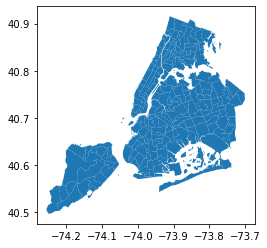

In [129]:
nta_shape.plot()

In [130]:
# dissolving nta shapes by borough
boro = nta_shape.dissolve(by='boro_name')
boro.head()

geometry ntacode  \
boro_name                                                                  
Bronx          MULTIPOLYGON (((-73.89919 40.79650, -73.89852 ...    BX28   
Brooklyn       MULTIPOLYGON (((-73.96081 40.57386, -73.96091 ...    BK69   
Manhattan      MULTIPOLYGON (((-74.00835 40.68640, -74.00816 ...    MN12   
Queens         MULTIPOLYGON (((-73.88307 40.56838, -73.88305 ...    QN08   
Staten Island  MULTIPOLYGON (((-74.22211 40.50260, -74.22217 ...    SI07   

                  shape_area county_fips                ntaname  \
boro_name                                                         
Bronx          25666124.7136         005  Van Cortlandt Village   
Brooklyn       20528197.0577         047           Clinton Hill   
Manhattan      34379942.2028         061        Upper West Side   
Queens         77412747.7604         081             St. Albans   
Staten Island  63256575.2896         085            Westerleigh   

                  shape_leng boro_code  
boro_name                               
Bronx          21945.7195842         2  
Brooklyn       23971.4662361         3  
Manhattan      29160.2062717         1  
Queens         45401.3169155         4  
Staten Island  41655.7048171         5

<AxesSubplot:>

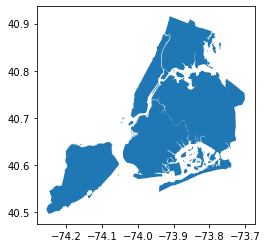

In [131]:
boro.plot()

# 12. Additional Attributes and Methods

## 12.1 Unary Predicates

In [132]:
nta_shape.geometry.is_empty.value_counts()

False    195
dtype: int64

In [133]:
nta_shape.geometry.isna().value_counts()

False    195
Name: geometry, dtype: int64

In [134]:
nta_shape['geometry'].is_simple.value_counts()

True    195
dtype: int64

## 12.2 Binary Predicates

In [135]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....  
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....  
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...  
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...

### 12.2.1 Centroids vs. Representative Points

In [136]:
nta_shape.centroid.geom_almost_equals(nta_shape.centroid).value_counts()

True    195
dtype: int64

In [137]:
# an nta's shape centroid does not equal their representative point
nta_shape.centroid.geom_almost_equals(nta_shape.representative_point()).value_counts()

False    195
dtype: int64

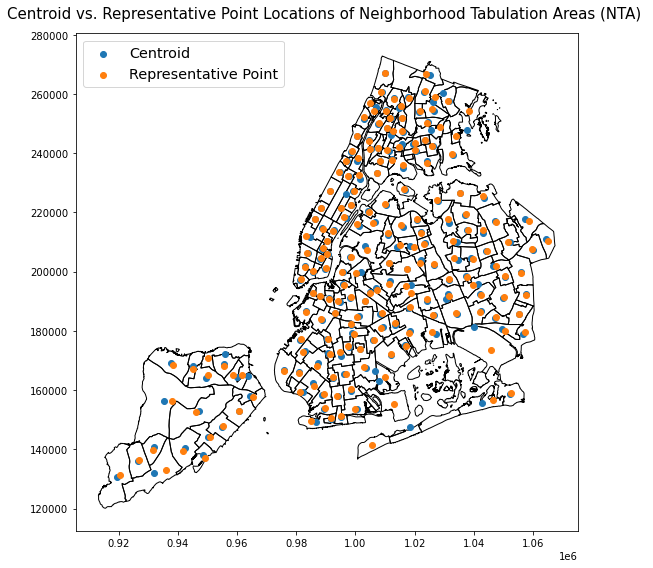

In [138]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

nta_shape.plot(ax=ax, 
               color='none', 
               edgecolor='black')

nta_shape.centroid.plot(ax=ax, 
                        label='Centroid')

nta_shape.representative_point().plot(ax=ax, 
                                      label='Representative Point')

ax.legend(loc=2, fontsize='x-large')
ax.set_title('Centroid vs. Representative Point Locations of Neighborhood Tabulation Areas (NTA) ', 
             fontsize=15,
             pad=15)
ax.set_aspect('equal', 'box')
plt.tight_layout()

## 12.3 Constructive Methods

In [139]:
# reading in nta shape data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.to_crs(epsg=2263, inplace=True)
nta_shape.head()

ntacode     shape_area county_fips                ntaname     shape_leng  \
0    QN08  77412747.7604         081             St. Albans  45401.3169155   
1    BK69  20528197.0577         047           Clinton Hill  23971.4662361   
2    BK46  17782095.6686         047    Ocean Parkway South  21975.9967416   
3    BX28  25666124.7136         005  Van Cortlandt Village  21945.7195842   
4    QN55  82461393.5232         081       South Ozone Park  36708.1692925   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
1  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....  
2  Brooklyn         3  MULTIPOLYGON (((992370.385 167211.562, 992446....  
3     Bronx         2  MULTIPOLYGON (((1015481.837 261490.578, 101548...  
4    Queens         4  MULTIPOLYGON (((1038120.503 188147.096, 103819...

### 12.3.1 Buffer

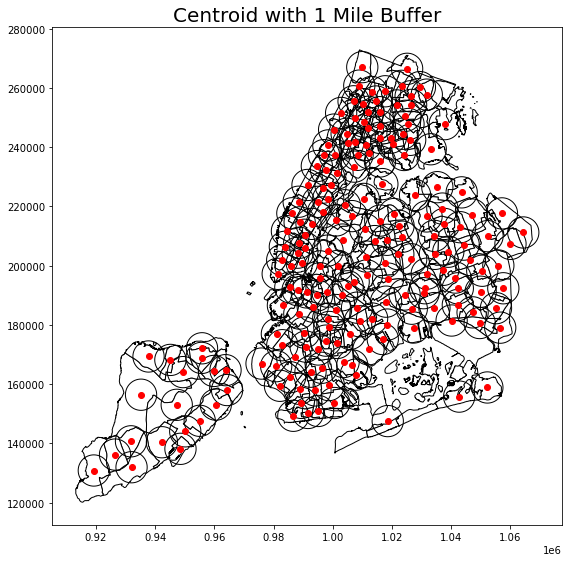

In [140]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# plotting a one mile radius buffer of the nta centroid
nta_shape.centroid.buffer(5280).plot(ax=ax, 
                                     color='none', 
                                     edgecolor='black')

nta_shape.centroid.plot(ax=ax, 
                        color='red', 
                        edgecolor='red')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=0)

ax.set_title('Centroid with 1 Mile Buffer', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.3.2 Translate/Offset

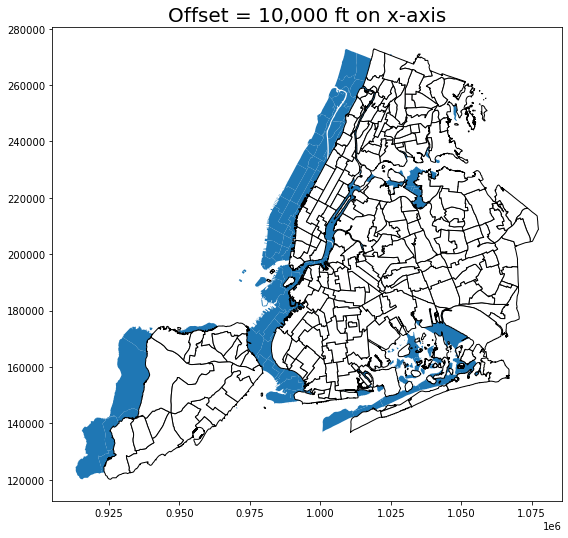

In [141]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# offset the nta shapes 10,000 feet to the right along the x-axis.
nta_shape.translate(10000).plot(ax=ax, 
                                color='white', 
                                edgecolor='black')

nta_shape.plot(ax=ax, 
               zorder=0)

ax.set_title('Offset = 10,000 ft on x-axis', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()